In [1]:
from subprocess import PIPE, run
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

%matplotlib inline

# Let's read the EXIF metadata using the exiftool
### The images used in this notebooks we're taken using a [Lenovo Mirage 180 Stereo Camera](https://www.lenovo.com/us/en/virtual-reality-and-smart-devices/virtual-and-augmented-reality/lenovo-mirage-camera/Mirage-Camera/p/ZA3A0022US)
- Let's read the `ImageData` part of the exif metadata as binary (which contains the right view image as a binary string
> We use `exiftool` and add the `-b` argument to parse as binary and segment the `ImageData` attribute using the `-ImageData` argument, NOICE!
- Write/use the right view image

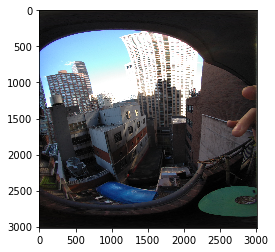

In [2]:
# Read the original image
original_file_path = '../samples/lenovo_mirage_ORIGINAL.JPG'
left_view_image = Image.open(original_file_path)

# Show it!
plt.imshow(left_view_image)
plt.show()

### Run `exiftool` and grab the binary image data from the EXIF metadata

In [26]:
image_data_from_exif = run(['exiftool', '-b', '-ImageData', original_file_path], stdout=PIPE)

### If you want to write the other view to disk as an image simply run:
```
with open('../samples/test.JPG', 'wb') as newFile:
    newFile.write(image_data_from_exif.stdout)
```

In [27]:
right_view_image = Image.open(BytesIO(image_data_from_exif.stdout))

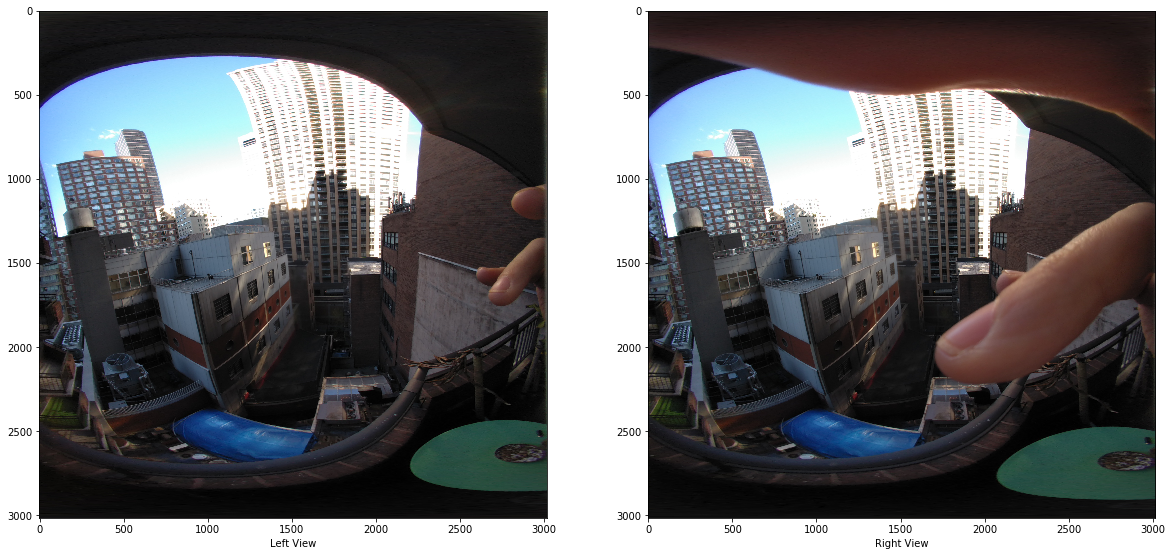

In [28]:
f = plt.figure(figsize=(20, 20))
f.add_subplot(1,2, 1)
plt.imshow(left_view_image)
plt.xlabel('Left View')
f.add_subplot(1,2, 2)
plt.imshow(right_view_image)
plt.xlabel('Right View')
plt.show()